In [31]:
import pandas as pd
product='pacifier'#hair_dryer microwave pacifier
df = pd.read_csv('cleaned_'+product+'.csv', header=0,index_col=0)

In [32]:
senti=df
#Classifying text based on sentiments(positive or negative)
senti["senti"] = senti["star_rating"]>=4
senti["senti"] = senti["senti"].replace([True , False] , ["pos" , "neg"])
senti.head()

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rate,review_headline_body,senti
0,572944212,"mary meyer wubbanub plush pacifier, lamb",5.0,0.0,0.0,0.0,1.0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31,0.0,Love this!Perfect match for the Gund Huggybudd...,pos
1,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Love 💕,My little girl love this paci contraption!,2015-08-31,0.0,Love 💕My little girl love this paci contraption!,pos
2,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,My son loves this one and will only sleep if h...,2015-08-31,0.0,Five StarsMy son loves this one and will only ...,pos
3,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,Perfect,2015-08-31,0.0,Five StarsPerfect,pos
4,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Five Stars,Amazing addition to the nursery!,2015-08-31,0.0,Five StarsAmazing addition to the nursery!,pos


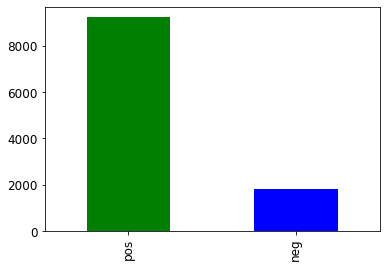

In [33]:
#Count of reviews based on sentiments
senti["senti"].value_counts().plot.bar(color=['green', 'blue'])

In [34]:
# 将标点符号用空格替换
import re
cleanup_re = re.compile('[^a-z]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence

senti["Summary_Clean"] = senti["review_headline_body"].apply(cleanup)

In [35]:
#Splitting training and testing dataset
split = senti[["Summary_Clean" , "senti"]]
train=split.sample(frac=0.8,random_state=200)
test=split.drop(train.index)
train["words"] = train["Summary_Clean"].str.lower().str.split()
test["words"] = test["Summary_Clean"].str.lower().str.split()
train.head()

,Summary_Clean,senti,words
7510,five starsvery cute,pos,"[five, starsvery, cute]"
1179,favorite these are my baby s favorite she has ...,pos,"[favorite, these, are, my, baby, s, favorite, ..."
2291,five starsgreat baby shower gift,pos,"[five, starsgreat, baby, shower, gift]"
12897,the chomp the chomp baby pacifier is hilarious...,pos,"[the, chomp, the, chomp, baby, pacifier, is, h..."
8025,five starstoo cute,pos,"[five, starstoo, cute]"


In [36]:
#BUILDING COUNTER AND TFIDF VECTOR FOR TEST<TRAIN AND CHECK DATA
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
stopwords = [
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves",'one','two','three','four','five','baby', 'boy', 'buy', 'come',
    'daughter', 'exactly', 'favorite', 'friend', 'good', 'great','item', 'just',
    'kid', 'like', 'love', 'make', 'month', 'newborn', 'paci', 'pacifier', 'pacis', 
    'receive', 'recommend', 'son', 'starsgreat', 'starslove','try', 'use',  'wubbanub']

tfidf_transformer = TfidfTransformer()
count_vect = CountVectorizer(min_df=2 ,stop_words=stopwords ,
                             ngram_range=(1,2))
X_train_counts = count_vect.fit_transform(train["Summary_Clean"])        
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(test["Summary_Clean"])
X_test_tfidf = tfidf_transformer.transform(X_new_counts)
# checktfidf = tfidf_transformer.transform(checkcounts)

In [37]:
prediction =  {} ## For storing results of different classifiers
#Fitting Multinomial NB
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB().fit(X_train_tfidf , train["senti"])
prediction['Multinomial'] = model1.predict_proba(X_test_tfidf)[:,1]
print("Multinomial Accuracy : {}".format(model1.score(X_test_tfidf , test["senti"])))

# check["multi"] = model1.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Multinomial Accuracy : 0.8307692307692308


In [38]:
#Fitting Bernouli NB
from sklearn.naive_bayes import BernoulliNB
model2 = BernoulliNB().fit(X_train_tfidf,train["senti"])
prediction['Bernoulli'] = model2.predict_proba(X_test_tfidf)[:,1]
print("Bernoulli Accuracy : {}".format(model2.score(X_test_tfidf , test["senti"])))

# check["Bill"] = model2.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Bernoulli Accuracy : 0.8402714932126697


In [39]:
#Fitting Logistic Regression
from sklearn import linear_model
logreg = linear_model.LogisticRegression(solver='lbfgs' , C=1000)
logistic = logreg.fit(X_train_tfidf, train["senti"])
prediction['LogisticRegression'] = logreg.predict_proba(X_test_tfidf)[:,1]
print("Logistic Regression Accuracy : {}".format(logreg.score(X_test_tfidf , test["senti"])))

# check["log"] = logreg.predict(checktfidf)## Predicting Sentiment for Check which was Null values for rating

Logistic Regression Accuracy : 0.8927601809954752


e:\scut\大三\pythonproject\mcm2020\venv\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
#Getting Most Occurence words in training test
words = count_vect.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(words, logistic.coef_[0])),
    columns = ['feature', 'coef'])
feature_coefs=feature_coefs.sort_values(by="coef")
feature_coefs.sort_values(by="coef").to_csv('feature_coefs_'+product+'.csv')

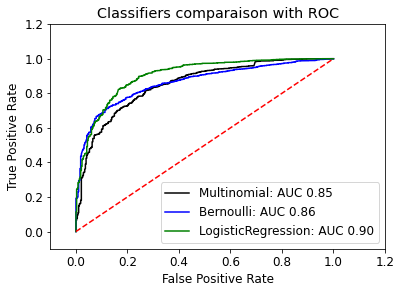

In [42]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import numpy as np

#To check out which classifier is doing what
def formatt(x):
    if x == 'neg':
        return 0
    if x == 0:
        return 0
    return 1
vfunc = np.vectorize(formatt)

cmp = 0
colors = ['k', 'b', 'g', 'm', 'y']
for model, predicted in prediction.items():
    if model not in 'Naive':
        false_positive_rate, true_positive_rate, thresholds = roc_curve(test["senti"].map(vfunc), predicted)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
        cmp += 1
# 对比三种模型的分类效果，发现线性回归效果最好
plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
fig=plt.gcf()
# fig.savefig('ROC_'+product+'_all_withSW.png')
plt.show()

In [43]:
# 对比三种模型的精确率、召回率、F1，加权各项得分，发现线性回归效果最好
test.senti = test.senti.replace(["pos" , "neg"] , [True , False] )
keys = prediction.keys()
for key in ['Multinomial', 'Bernoulli', 'LogisticRegression']:
    print(" {}:".format(key))
    print(metrics.classification_report(test["senti"], prediction.get(key)>.5, 
                                        target_names = ["positive", "negative"]))
    print("\n")

 Multinomial:
              precision    recall  f1-score   support

    positive       1.00      0.02      0.04       382
    negative       0.83      1.00      0.91      1828

    accuracy                           0.83      2210
   macro avg       0.92      0.51      0.47      2210
weighted avg       0.86      0.83      0.76      2210



 Bernoulli:
              precision    recall  f1-score   support

    positive       0.58      0.27      0.37       382
    negative       0.86      0.96      0.91      1828

    accuracy                           0.84      2210
   macro avg       0.72      0.62      0.64      2210
weighted avg       0.81      0.84      0.82      2210



 LogisticRegression:
              precision    recall  f1-score   support

    positive       0.74      0.59      0.66       382
    negative       0.92      0.96      0.94      1828

    accuracy                           0.89      2210
   macro avg       0.83      0.77      0.80      2210
weighted avg       0.89

In [44]:
# 用线性回归模型预测每一条评论为正面的概率
def test_sample( sample,model):
    sample_counts = count_vect.transform([sample])
    sample_tfidf = tfidf_transformer.transform(sample_counts)
    result = model.predict(sample_tfidf)[0]
    prob = model.predict_proba(sample_tfidf)[0]
    # print("Sample estimated as %s: negative prob %f, positive prob %f" % (result.upper(), prob[0], prob[1]))
    return prob[1]
df['pos_prob']=df['review_headline_body'].apply(test_sample,args=[logreg])
df

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rate,review_headline_body,senti,Summary_Clean,pos_prob
0,572944212,"mary meyer wubbanub plush pacifier, lamb",5.0,0.0,0.0,0.0,1.0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31,0.0,Love this!Perfect match for the Gund Huggybudd...,pos,love this perfect match for the gund huggybudd...,1.000000
1,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Love 💕,My little girl love this paci contraption!,2015-08-31,0.0,Love 💕My little girl love this paci contraption!,pos,love my little girl love this paci contraption,0.999397
2,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,My son loves this one and will only sleep if h...,2015-08-31,0.0,Five StarsMy son loves this one and will only ...,pos,five starsmy son loves this one and will only ...,1.000000
3,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,Perfect,2015-08-31,0.0,Five StarsPerfect,pos,five starsperfect,1.000000
4,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Five Stars,Amazing addition to the nursery!,2015-08-31,0.0,Five StarsAmazing addition to the nursery!,pos,five starsamazing addition to the nursery,0.999939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,51313971,munchkin deluxe bottle and food warmer with p...,2.0,0.0,0.0,0.0,0.0,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24,0.0,Not for bottle linersWe have been using the bo...,neg,not for bottle linerswe have been using the bo...,0.014768
18935,51313971,munchkin deluxe bottle and food warmer with p...,4.0,1.0,1.0,0.0,0.0,good enough for me,"This isn't the greatest product ever invented,...",2004-04-04,1.0,good enough for meThis isn't the greatest prod...,pos,good enough for methis isn t the greatest prod...,0.999301
18936,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,I love it!,I love this bottle warmer. After researching ...,2004-04-04,0.0,I love it!I love this bottle warmer. After re...,pos,i love it i love this bottle warmer after rese...,0.987004
18937,51313971,munchkin deluxe bottle and food warmer with p...,1.0,2.0,2.0,0.0,0.0,save your money,I finally broke down and opened this shower gi...,2003-12-02,1.0,save your moneyI finally broke down and opened...,neg,save your moneyi finally broke down and opened...,0.010354


In [45]:
# 综合实际打分、预测出的的评论为正面的概率、“有用”比例、是否购买、是否是会员五项指标计算出综合得分
df['final_rate']=(df['star_rating']*6+df['pos_prob']*70)*(0.7+df['helpful_rate']*0.1+df['verified_purchase']*0.1+df['vine']*0.1)
df=df.fillna(0)
# 将结果输出
# df.groupby(['product_parent','review_date'.month])['final_rate'].mean()
# df.to_csv('classified_'+product+'.csv')
df

,product_parent,product_title,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_rate,review_headline_body,senti,Summary_Clean,pos_prob,final_rate
0,572944212,"mary meyer wubbanub plush pacifier, lamb",5.0,0.0,0.0,0.0,1.0,Love this!,Perfect match for the Gund Huggybuddy I bought...,2015-08-31,0.0,Love this!Perfect match for the Gund Huggybudd...,pos,love this perfect match for the gund huggybudd...,1.000000,79.999996
1,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Love 💕,My little girl love this paci contraption!,2015-08-31,0.0,Love 💕My little girl love this paci contraption!,pos,love my little girl love this paci contraption,0.999397,79.966240
2,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,My son loves this one and will only sleep if h...,2015-08-31,0.0,Five StarsMy son loves this one and will only ...,pos,five starsmy son loves this one and will only ...,1.000000,79.999999
3,392768822,wubbanub infant pacifier - giraffe,5.0,0.0,0.0,0.0,1.0,Five Stars,Perfect,2015-08-31,0.0,Five StarsPerfect,pos,five starsperfect,1.000000,79.999999
4,911821018,wubbanub lamb infant pacifier,5.0,0.0,0.0,0.0,1.0,Five Stars,Amazing addition to the nursery!,2015-08-31,0.0,Five StarsAmazing addition to the nursery!,pos,five starsamazing addition to the nursery,0.999939,79.996582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,51313971,munchkin deluxe bottle and food warmer with p...,2.0,0.0,0.0,0.0,0.0,Not for bottle liners,We have been using the bottle warmer and have ...,2004-05-24,0.0,Not for bottle linersWe have been using the bo...,neg,not for bottle linerswe have been using the bo...,0.014768,9.123624
18935,51313971,munchkin deluxe bottle and food warmer with p...,4.0,1.0,1.0,0.0,0.0,good enough for me,"This isn't the greatest product ever invented,...",2004-04-04,1.0,good enough for meThis isn't the greatest prod...,pos,good enough for methis isn t the greatest prod...,0.999301,75.160870
18936,51313971,munchkin deluxe bottle and food warmer with p...,5.0,0.0,0.0,0.0,0.0,I love it!,I love this bottle warmer. After researching ...,2004-04-04,0.0,I love it!I love this bottle warmer. After re...,pos,i love it i love this bottle warmer after rese...,0.987004,69.363177
18937,51313971,munchkin deluxe bottle and food warmer with p...,1.0,2.0,2.0,0.0,0.0,save your money,I finally broke down and opened this shower gi...,2003-12-02,1.0,save your moneyI finally broke down and opened...,neg,save your moneyi finally broke down and opened...,0.010354,5.379836


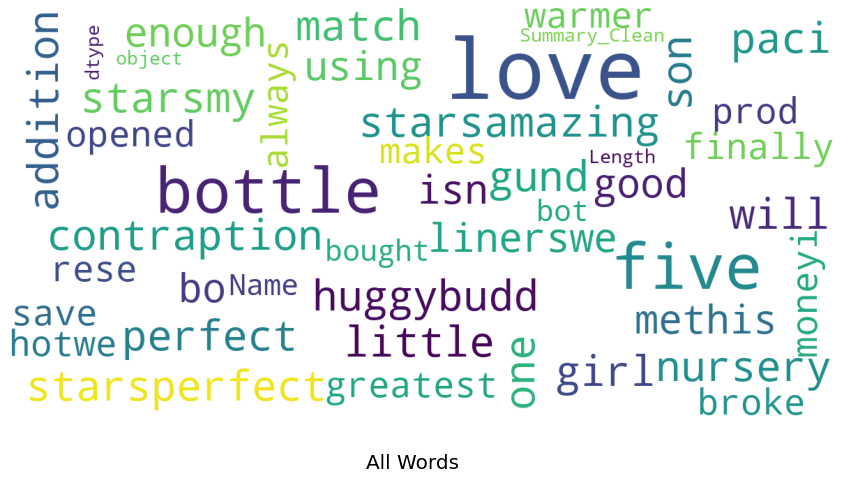

In [46]:
#WORDCLOUD for overall reviews
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)


mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=100             #72 
mpl.rcParams['figure.subplot.bottom']=.1 


def show_wordcloud(data, title = 'All Words'):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
        
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    # plt.show()
    fig=plt.gcf()
    fig.savefig(title+"_"+product+'.png')
    plt.show()
show_wordcloud(senti["Summary_Clean"])

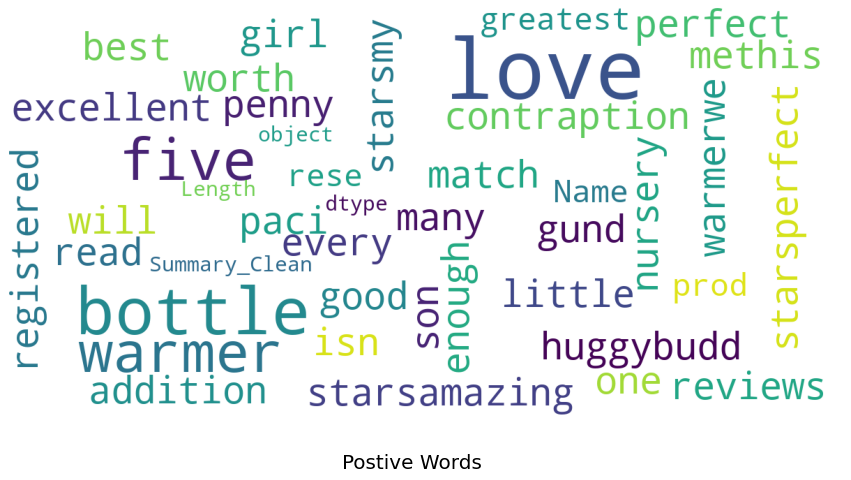

In [47]:
# 正面评价的词云
#WORDCLOUD based on positive reviews
show_wordcloud(senti["Summary_Clean"][senti.senti == "pos"] , title="Postive Words")

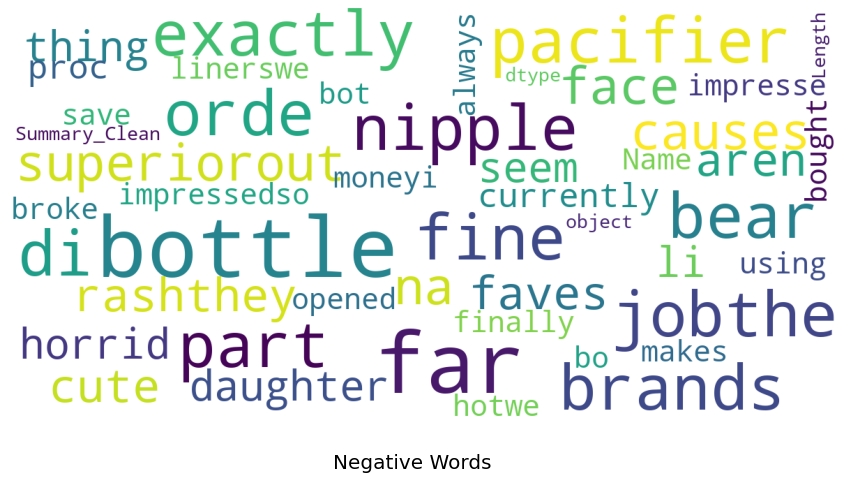

In [48]:
# 负面评价的词云
#wordcloud based on negative reviews
show_wordcloud(senti["Summary_Clean"][senti.senti == "neg"] , title="Negative Words")
